# Support Vector Machine


A Support Vector Machine (SVM) is a discriminative classifier formally defined by a separating hyperplane. 

In other words, given labeled training data (supervised learning), the algorithm outputs an optimal hyperplane which categorizes new examples. 

In two dimensional space this hyperplane is a line dividing a plane in two parts where in each class lay in either side. 

### Separation of classes!!

SVM is a supervised machine learning algorithm which can be used for both classification or regression problems. It's mainly used in classification problems.

Support Vectors are the co-ordinates of individual observation.

Support Vector Machine is a frontier which best segregates the two classes (hyper-plane/ line).

### Tuning Parameters

<b>Kernel</b> defines the type of separation (linear, polynomial, exponential)

<b>Regularization</b> parameter (C parameter in sklearn classification) tells the SVM optimization how much you want to avoid misclassifying each training example.

<b>Gamma</b> parameter defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’. In other words, with low gamma, points far away from plausible seperation line are considered in calculation for the seperation line. Where as high gamma means ONLY those points close to plausible line are considered in calculation.

<b>Margin</b> is a separation of line to the closest class points. A good margin is one where this separation is larger for both the classes. Images below gives to visual example of good and bad margin. A good margin allows the points to be in their respective classes without crossing to other class.


In [1]:
# import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import accuracy_score

In [2]:
%matplotlib inline

In [3]:
# import built-in iris dataset
iris = datasets.load_iris()
print(type(iris))
print(iris)

<class 'sklearn.utils.Bunch'>
{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
    

In [4]:
# taking only first two features (sepals)
iris_X = iris.data[:, :2]
print(iris_X)

[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]
 [5.4 3.9]
 [4.6 3.4]
 [5.  3.4]
 [4.4 2.9]
 [4.9 3.1]
 [5.4 3.7]
 [4.8 3.4]
 [4.8 3. ]
 [4.3 3. ]
 [5.8 4. ]
 [5.7 4.4]
 [5.4 3.9]
 [5.1 3.5]
 [5.7 3.8]
 [5.1 3.8]
 [5.4 3.4]
 [5.1 3.7]
 [4.6 3.6]
 [5.1 3.3]
 [4.8 3.4]
 [5.  3. ]
 [5.  3.4]
 [5.2 3.5]
 [5.2 3.4]
 [4.7 3.2]
 [4.8 3.1]
 [5.4 3.4]
 [5.2 4.1]
 [5.5 4.2]
 [4.9 3.1]
 [5.  3.2]
 [5.5 3.5]
 [4.9 3.1]
 [4.4 3. ]
 [5.1 3.4]
 [5.  3.5]
 [4.5 2.3]
 [4.4 3.2]
 [5.  3.5]
 [5.1 3.8]
 [4.8 3. ]
 [5.1 3.8]
 [4.6 3.2]
 [5.3 3.7]
 [5.  3.3]
 [7.  3.2]
 [6.4 3.2]
 [6.9 3.1]
 [5.5 2.3]
 [6.5 2.8]
 [5.7 2.8]
 [6.3 3.3]
 [4.9 2.4]
 [6.6 2.9]
 [5.2 2.7]
 [5.  2. ]
 [5.9 3. ]
 [6.  2.2]
 [6.1 2.9]
 [5.6 2.9]
 [6.7 3.1]
 [5.6 3. ]
 [5.8 2.7]
 [6.2 2.2]
 [5.6 2.5]
 [5.9 3.2]
 [6.1 2.8]
 [6.3 2.5]
 [6.1 2.8]
 [6.4 2.9]
 [6.6 3. ]
 [6.8 2.8]
 [6.7 3. ]
 [6.  2.9]
 [5.7 2.6]
 [5.5 2.4]
 [5.5 2.4]
 [5.8 2.7]
 [6.  2.7]
 [5.4 3. ]
 [6.  3.4]
 [6.7 3.1]
 [6.3 2.3]
 [5.6 3. ]
 [5.5 2.5]
 [5.5 2.6]

In [5]:
iris_y = iris.target
print(iris_y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


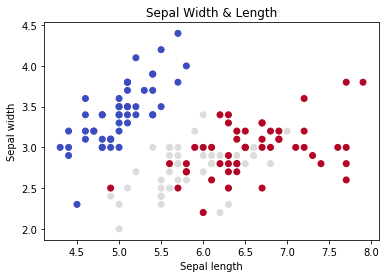

In [6]:
# Visualizing the relationship between sepal and target classes
def visuvalize_sepal_data():
    plt.scatter(iris_X[:, 0], iris_X[:, 1], c=iris_y, cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.title('Sepal Width & Length')
    plt.show()

visuvalize_sepal_data()

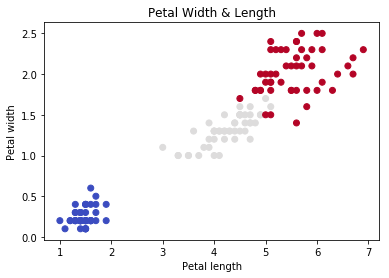

In [7]:
# Visualizing the relationship between Petal and target classes
def visuvalize_petal_data():
    iris_Xp = iris.data[:, 2:]   # last two features are for petal
    plt.scatter(iris_Xp[:, 0], iris_Xp[:, 1], c=iris_y, cmap=plt.cm.coolwarm)
    plt.xlabel('Petal length')
    plt.ylabel('Petal width')
    plt.title('Petal Width & Length')
    plt.show()

visuvalize_petal_data()

In [8]:
# train test split

from  sklearn.model_selection import train_test_split

In [9]:
# Train (75%), Test (25%)
iris_X_train, iris_X_test, iris_y_train, iris_y_test = train_test_split(iris_X, iris_y, test_size=0.25, random_state=143)

In [10]:
# iris_X_train => feature set
# iris_Y_train => label set
[iris_X_train, iris_X_test, iris_y_train, iris_y_test]

[array([[5.1, 3.7],
        [6.1, 3. ],
        [5.5, 2.4],
        [6.3, 2.5],
        [5. , 3.3],
        [5.8, 2.7],
        [4.9, 2.4],
        [4.8, 3. ],
        [5.7, 2.5],
        [5.2, 2.7],
        [5.7, 3. ],
        [6.7, 3. ],
        [6.9, 3.2],
        [6.5, 2.8],
        [5.6, 2.5],
        [5.8, 2.6],
        [5.9, 3.2],
        [5.5, 3.5],
        [5.7, 2.8],
        [4.6, 3.4],
        [5.6, 2.8],
        [5.1, 3.3],
        [5.1, 3.8],
        [5.9, 3. ],
        [6.7, 2.5],
        [6.1, 2.9],
        [4.9, 3.1],
        [5.4, 3.9],
        [7. , 3.2],
        [5. , 3.5],
        [6.6, 3. ],
        [7.9, 3.8],
        [6.3, 2.5],
        [5.5, 2.5],
        [4.3, 3. ],
        [5.5, 2.4],
        [5.7, 2.9],
        [6.2, 2.9],
        [6.8, 3.2],
        [5.4, 3.4],
        [4.8, 3.4],
        [5.4, 3.4],
        [6. , 2.7],
        [4.4, 3.2],
        [4.8, 3.1],
        [6.3, 3.3],
        [5.6, 2.9],
        [6.7, 3.1],
        [5. , 3. ],
        [7.4, 2.8],


In [11]:
# initialize instance of SVM Classification 
svc = svm.SVC(kernel='linear', C=10.0, gamma=0.37)
print(type(svc))

<class 'sklearn.svm.classes.SVC'>


In [12]:
print("Training model")
#train model
svc.fit(iris_X_train, iris_y_train)

Training model


SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.37, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [13]:
predicted_labels = svc.predict(iris_X_test)
print("Accuracy score after classification: " + str(accuracy_score(iris_y_test, predicted_labels)*100) + "%")

Accuracy score after classification: 78.94736842105263%


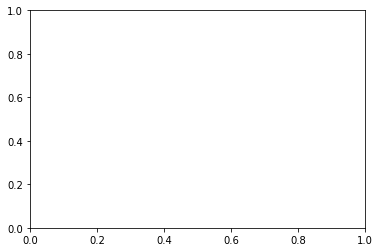

In [14]:
# create a mesh to plot in
x_min, x_max = iris_X[:, 0].min() - 1, iris_X[:, 0].max() + 1
y_min, y_max = iris_X[:, 1].min() - 1, iris_X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
plt.subplot(1, 1, 1)

In [15]:
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
print(Z)
print(type(Z))

[1 1 1 ... 2 2 2]
<class 'numpy.ndarray'>


In [16]:
Z = Z.reshape(xx.shape)
print(Z)
print(type(Z))

[[1 1 1 ... 2 2 2]
 [1 1 1 ... 2 2 2]
 [1 1 1 ... 2 2 2]
 ...
 [0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]]
<class 'numpy.ndarray'>


Text(0.5,1,'SVC with linear kernel')

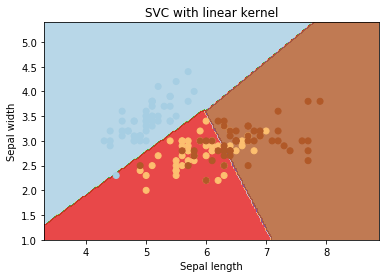

In [17]:
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(iris_X[:, 0], iris_X[:, 1], c=iris_y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')

In [18]:
C = 1.0  # SVM regularization parameter

# title for the plots
titles = ['SVC with Linear kernel',
	   'Linear SVC (Linear kernel)',
	    'SVC with RBF kernel',
	    'SVC with Polynomial (degree 3) kernel']

In [19]:
# SVC with linear kernel
svc = svm.SVC(kernel='linear', C=C).fit(iris_X, iris_y)
predicted_labels = svc.predict(iris_X_test)
print("Accuracy score after classification for " 
      + titles[0] + ": " + str(accuracy_score(iris_y_test, predicted_labels)*100) + "%")

Accuracy score after classification for SVC with Linear kernel: 81.57894736842105%


In [20]:
# LinearSVC (linear kernel)
lin_svc = svm.LinearSVC(C=C).fit(iris_X, iris_y)
predicted_labels = lin_svc.predict(iris_X_test)
print("Accuracy score after classification for "
      + titles[1] + ": " + str(accuracy_score(iris_y_test, predicted_labels)*100) + "%")

Accuracy score after classification for Linear SVC (Linear kernel): 78.94736842105263%


In [21]:
# SVC with RBF kernel
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(iris_X, iris_y)
predicted_labels = rbf_svc.predict(iris_X_test)
print("Accuracy score after classification for "
      + titles[2] + ": " + str(accuracy_score(iris_y_test, predicted_labels)*100) + "%")

Accuracy score after classification for SVC with RBF kernel: 81.57894736842105%


In [22]:
# SVC with polynomial (degree 3) kernel
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(iris_X, iris_y)
predicted_labels = poly_svc.predict(iris_X_test)
print("Accuracy score after classification for " 
      + titles[3] + ": " + str(accuracy_score(iris_y_test, predicted_labels)*100) + "%")

Accuracy score after classification for SVC with Polynomial (degree 3) kernel: 81.57894736842105%


In [23]:
h = .02  # step size in the mesh

In [24]:
# create a mesh to plot in
x_min, x_max = iris_X[:, 0].min() - 1, iris_X[:, 0].max() + 1
y_min, y_max = iris_X[:, 1].min() - 1, iris_X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
	                     np.arange(y_min, y_max, h))

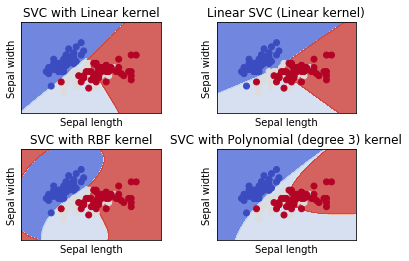

In [25]:
for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].

    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    
    # Plot also the training points
    plt.scatter(iris_X[:, 0], iris_X[:, 1], c=iris_y, cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])


#### References

1. SVM (Support Vector Machine) <br/>
https://medium.com/machine-learning-101/chapter-2-svm-support-vector-machine-theory-f0812effc72
